## Exercici 1
**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.**

In [21]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

El texto seleccionado para este ejercicio lo extraemos de la libreria Guterberg (https://www.gutenberg.org/ebooks/search/?query=&submit_search=Search), concretamente: 'The Brothers Karamazov by Fyodor Dostoyevsky' de  Fyodor Dostoyevsky. (https://www.gutenberg.org/files/28054/28054-0.txt)

In [24]:
text = """Chapter I.
Fyodor Pavlovitch Karamazov


Alexey Fyodorovitch Karamazov was the third son of Fyodor Pavlovitch 
Karamazov, a land owner well known in our district in his own day, and 
still remembered among us owing to his gloomy and tragic death, which 
happened thirteen years ago, and which I shall describe in its properplace. 
For the present I will only say that this “landowner”—for so we
used to call him, although he hardly spent a day of his life on his own
estate—was a strange type, yet one pretty frequently to be met with, a
type abject and vicious and at the same time senseless. But he was one
of those senseless persons who are very well capable of looking after
their worldly affairs, and, apparently, after nothing else. Fyodor
Pavlovitch, for instance, began with next to nothing; his estate was of
the smallest; he ran to dine at other men’s tables, and fastened on
them as a toady, yet at his death it appeared that he had a hundred
thousand roubles in hard cash. At the same time, he was all his life
one of the most senseless, fantastical fellows in the whole district. I
repeat, it was not stupidity—the majority of these fantastical fellows
are shrewd and intelligent enough—but just senselessness, and a
peculiar national form of it.

He was married twice, and had three sons, the eldest, Dmitri, by his
first wife, and two, Ivan and Alexey, by his second. Fyodor
Pavlovitch’s first wife, Adelaïda Ivanovna, belonged to a fairly rich
and distinguished noble family, also landowners in our district, the
Miüsovs. How it came to pass that an heiress, who was also a beauty,
and moreover one of those vigorous, intelligent girls, so common in
this generation, but sometimes also to be found in the last, could have
married such a worthless, puny weakling, as we all called him, I won’t
attempt to explain. I knew a young lady of the last “romantic”
generation who after some years of an enigmatic passion for a
gentleman, whom she might quite easily have married at any moment,
invented insuperable obstacles to their union, and ended by throwing
herself one stormy night into a rather deep and rapid river from a high
bank, almost a precipice, and so perished, entirely to satisfy her own
caprice, and to be like Shakespeare’s Ophelia. Indeed, if this
precipice, a chosen and favorite spot of hers, had been less
picturesque, if there had been a prosaic flat bank in its place, most
likely the suicide would never have taken place. This is a fact, and
probably there have been not a few similar instances in the last two or
three generations. Adelaïda Ivanovna Miüsov’s action was similarly, no
doubt, an echo of other people’s ideas, and was due to the irritation
caused by lack of mental freedom. She wanted, perhaps, to show her
feminine independence, to override class distinctions and the despotism
of her family. And a pliable imagination persuaded her, we must
suppose, for a brief moment, that Fyodor Pavlovitch, in spite of his
parasitic position, was one of the bold and ironical spirits of that
progressive epoch, though he was, in fact, an ill‐natured buffoon and
nothing more. What gave the marriage piquancy was that it was preceded
by an elopement, and this greatly captivated Adelaïda Ivanovna’s fancy.
Fyodor Pavlovitch’s position at the time made him specially eager for
any such enterprise, for he was passionately anxious to make a career
in one way or another. To attach himself to a good family and obtain a
dowry was an alluring prospect. As for mutual love it did not exist
apparently, either in the bride or in him, in spite of Adelaïda
Ivanovna’s beauty. This was, perhaps, a unique case of the kind in the
life of Fyodor Pavlovitch, who was always of a voluptuous temper, and
ready to run after any petticoat on the slightest encouragement. She
seems to have been the only woman who made no particular appeal to his
senses.

Immediately after the elopement Adelaïda Ivanovna discerned in a flash
that she had no feeling for her husband but contempt. The marriage
accordingly showed itself in its true colors with extraordinary
rapidity. Although the family accepted the event pretty quickly and
apportioned the runaway bride her dowry, the husband and wife began to
lead a most disorderly life, and there were everlasting scenes between
them. It was said that the young wife showed incomparably more
generosity and dignity than Fyodor Pavlovitch, who, as is now known,
got hold of all her money up to twenty‐five thousand roubles as soon as
she received it, so that those thousands were lost to her for ever. The
little village and the rather fine town house which formed part of her
dowry he did his utmost for a long time to transfer to his name, by
means of some deed of conveyance. He would probably have succeeded,
merely from her moral fatigue and desire to get rid of him, and from
the contempt and loathing he aroused by his persistent and shameless
importunity. But, fortunately, Adelaïda Ivanovna’s family intervened
and circumvented his greediness. It is known for a fact that frequent
fights took place between the husband and wife, but rumor had it that
Fyodor Pavlovitch did not beat his wife but was beaten by her, for she
was a hot‐tempered, bold, dark‐browed, impatient woman, possessed of
remarkable physical strength. Finally, she left the house and ran away
from Fyodor Pavlovitch with a destitute divinity student, leaving
Mitya, a child of three years old, in her husband’s hands. Immediately
Fyodor Pavlovitch introduced a regular harem into the house, and
abandoned himself to orgies of drunkenness. In the intervals he used to
drive all over the province, complaining tearfully to each and all of
Adelaïda Ivanovna’s having left him, going into details too disgraceful
for a husband to mention in regard to his own married life. What seemed
to gratify him and flatter his self‐love most was to play the
ridiculous part of the injured husband, and to parade his woes with
embellishments.

“One would think that you’d got a promotion, Fyodor Pavlovitch, you
seem so pleased in spite of your sorrow,” scoffers said to him. Many
even added that he was glad of a new comic part in which to play the
buffoon, and that it was simply to make it funnier that he pretended to
be unaware of his ludicrous position. But, who knows, it may have been
simplicity. At last he succeeded in getting on the track of his runaway
wife. The poor woman turned out to be in Petersburg, where she had gone
with her divinity student, and where she had thrown herself into a life
of complete emancipation. Fyodor Pavlovitch at once began bustling
about, making preparations to go to Petersburg, with what object he
could not himself have said. He would perhaps have really gone; but
having determined to do so he felt at once entitled to fortify himself
for the journey by another bout of reckless drinking. And just at that
time his wife’s family received the news of her death in Petersburg.
She had died quite suddenly in a garret, according to one story, of
typhus, or as another version had it, of starvation. Fyodor Pavlovitch
was drunk when he heard of his wife’s death, and the story is that he
ran out into the street and began shouting with joy, raising his hands
to Heaven: “Lord, now lettest Thou Thy servant depart in peace,” but
others say he wept without restraint like a little child, so much so
that people were sorry for him, in spite of the repulsion he inspired.
It is quite possible that both versions were true, that he rejoiced at
his release, and at the same time wept for her who released him. As a
general rule, people, even the wicked, are much more naïve and
simple‐hearted than we suppose. And we ourselves are, too."""


In [44]:
# tokenizamos el texto
token_text=word_tokenize(text)
print(token_text)

['Chapter', 'I.', 'Fyodor', 'Pavlovitch', 'Karamazov', 'Alexey', 'Fyodorovitch', 'Karamazov', 'was', 'the', 'third', 'son', 'of', 'Fyodor', 'Pavlovitch', 'Karamazov', ',', 'a', 'land', 'owner', 'well', 'known', 'in', 'our', 'district', 'in', 'his', 'own', 'day', ',', 'and', 'still', 'remembered', 'among', 'us', 'owing', 'to', 'his', 'gloomy', 'and', 'tragic', 'death', ',', 'which', 'happened', 'thirteen', 'years', 'ago', ',', 'and', 'which', 'I', 'shall', 'describe', 'in', 'its', 'properplace', '.', 'For', 'the', 'present', 'I', 'will', 'only', 'say', 'that', 'this', '“', 'landowner', '”', '—for', 'so', 'we', 'used', 'to', 'call', 'him', ',', 'although', 'he', 'hardly', 'spent', 'a', 'day', 'of', 'his', 'life', 'on', 'his', 'own', 'estate—was', 'a', 'strange', 'type', ',', 'yet', 'one', 'pretty', 'frequently', 'to', 'be', 'met', 'with', ',', 'a', 'type', 'abject', 'and', 'vicious', 'and', 'at', 'the', 'same', 'time', 'senseless', '.', 'But', 'he', 'was', 'one', 'of', 'those', 'senseles

In [26]:
# calculamos la frecuencia de cada palabra en el texto
fdist = FreqDist(token_text)
print('Number of tokens: ' + str(len(token_text))) 
print('Number of unique words: ' + str(len(fdist)))

Number of tokens: 1546
Number of unique words: 581


In [27]:
# vemos cuáles son las palabras más frecuentes
fdist.most_common(6)

[(',', 124), ('and', 49), ('the', 47), ('.', 46), ('to', 45), ('of', 43)]

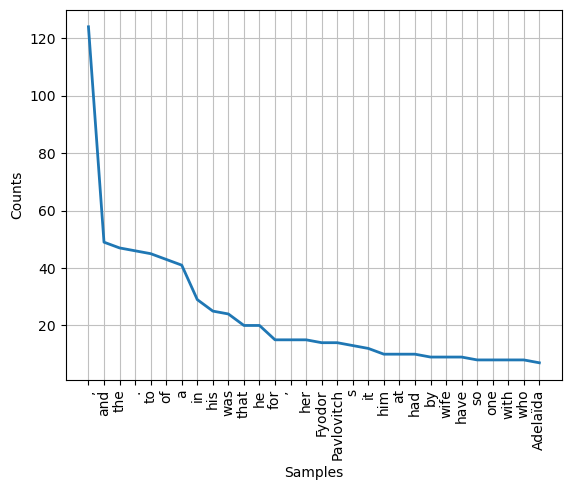

<IPython.core.display.Javascript object>

In [28]:
# reflejamos en una gráfica la frecuencia
fdist.plot(30,cumulative=False)
plt.show()

## Exercici 2
**Treu les stopwords i realitza stemming al teu conjunt de dades.**

In [45]:
import re
#Eliminación de signos de puntuación.

print('Número de tokens en nuestro texto antes de limpiar signos de puntuación: ',len(token_text))

tokenized_text = [re.sub("[^-9A-Za-z ]", "" , w) for w in token_text]

while '' in token_text:
    token_text.remove('')

print('Número de tokens en nuestro texto después de limpiar signos de puntuación: ',len(token_text))

Número de tokens en nuestro texto antes de limpiar signos de puntuación:  1546
Número de tokens en nuestro texto después de limpiar signos de puntuación:  1546


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

*Eliminación de Stopwords.*
*Se conocen como Stopwords las palabras vacías que no agregan significado a los datos, se consideran 'ruido'. Estas palabras deben eliminarse, ayuda a reducir las características de nuestros datos.*

In [46]:

# obtenemos la lista de Stopwords de un módulo de la librería nltk, hacemos un set con ellas
stop_words=set(stopwords.words("english"))
print(stop_words)

{'nor', 'herself', 'above', 'than', 'doesn', 'itself', 'any', 'wasn', 'when', 'then', "weren't", 'ours', 'needn', 'all', 'who', "you're", 'because', 'as', 's', 'they', 'll', 'has', 'this', 'if', 'after', 'off', 'have', "you've", 'myself', 'or', 'do', 'more', "mightn't", "couldn't", 'isn', 'he', 'haven', "you'll", 'should', 'hadn', 'having', 'them', 'about', "didn't", 'the', 'once', 'which', 'been', 'wouldn', 'before', 'yours', 'only', 'we', 'doing', 'in', 'y', 'such', 'won', 'down', 'up', "won't", 'me', "she's", 'further', 'both', 'a', 'him', 'd', 'those', 'ourselves', 'yourselves', 'be', 'don', "shouldn't", 'on', "hasn't", 'she', 'between', "don't", 'while', 'it', 'being', 'some', "aren't", "hadn't", 'until', "shan't", 'below', "wouldn't", 'but', 'can', 'during', "haven't", 'shan', 'whom', 'are', 'i', "mustn't", 'am', 'o', 'mightn', 'mustn', 'these', 'its', 'where', 'now', 'you', 're', 'by', 'not', 'why', 'over', 'under', 'against', 'our', 'again', 'here', 'other', 'no', 'm', "needn't

In [47]:
# filtramos nuestros tokens
filtered_text=[]
for word in tokenized_text:
    if word not in stop_words:
        filtered_text.append(word)
print("Tokenized Sentence:",tokenized_text)
print('')
print("Filterd Sentence:",filtered_text)

Tokenized Sentence: ['Chapter', 'I', 'Fyodor', 'Pavlovitch', 'Karamazov', 'Alexey', 'Fyodorovitch', 'Karamazov', 'was', 'the', 'third', 'son', 'of', 'Fyodor', 'Pavlovitch', 'Karamazov', '', 'a', 'land', 'owner', 'well', 'known', 'in', 'our', 'district', 'in', 'his', 'own', 'day', '', 'and', 'still', 'remembered', 'among', 'us', 'owing', 'to', 'his', 'gloomy', 'and', 'tragic', 'death', '', 'which', 'happened', 'thirteen', 'years', 'ago', '', 'and', 'which', 'I', 'shall', 'describe', 'in', 'its', 'properplace', '', 'For', 'the', 'present', 'I', 'will', 'only', 'say', 'that', 'this', '', 'landowner', '', 'for', 'so', 'we', 'used', 'to', 'call', 'him', '', 'although', 'he', 'hardly', 'spent', 'a', 'day', 'of', 'his', 'life', 'on', 'his', 'own', 'estatewas', 'a', 'strange', 'type', '', 'yet', 'one', 'pretty', 'frequently', 'to', 'be', 'met', 'with', '', 'a', 'type', 'abject', 'and', 'vicious', 'and', 'at', 'the', 'same', 'time', 'senseless', '', 'But', 'he', 'was', 'one', 'of', 'those', 'se

*Stemming.*
*El stemming es un proceso de normalización lingüística que reduce las palabras a su raíz elinando los sufijos. La palabra derivada puede no ser parte del diccionario, es decir, no necesariamente dará significado. Hay dos tipos principales de Stemmer: Porter Stemmer y Snow Ball Stemmer (versión avanzada de Porter Stemmer).*

In [34]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_text)
print('')
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Chapter', 'I', 'Fyodor', 'Pavlovitch', 'Karamazov', 'Alexey', 'Fyodorovitch', 'Karamazov', 'third', 'son', 'Fyodor', 'Pavlovitch', 'Karamazov', '', 'land', 'owner', 'well', 'known', 'district', 'day', '', 'still', 'remembered', 'among', 'us', 'owing', 'gloomy', 'tragic', 'death', '', 'happened', 'thirteen', 'years', 'ago', '', 'I', 'shall', 'describe', 'properplace', '', 'For', 'present', 'I', 'say', '', 'landowner', '', 'used', 'call', '', 'although', 'hardly', 'spent', 'day', 'life', 'estatewas', 'strange', 'type', '', 'yet', 'one', 'pretty', 'frequently', 'met', '', 'type', 'abject', 'vicious', 'time', 'senseless', '', 'But', 'one', 'senseless', 'persons', 'well', 'capable', 'looking', 'worldly', 'affairs', '', '', 'apparently', '', 'nothing', 'else', '', 'Fyodor', 'Pavlovitch', '', 'instance', '', 'began', 'next', 'nothing', '', 'estate', 'smallest', '', 'ran', 'dine', 'men', '', 'tables', '', 'fastened', 'toady', '', 'yet', 'death', 'appeared', 'hundred', 'tho

In [35]:
# Volvemos a calcular la frecuencia para ver cómo se han reducido nuestras palabra y cómo todas aportan contenido al conjunto de nuestros datos.
fdist = FreqDist(stemmed_words)
print(fdist)

<FreqDist with 457 samples and 888 outcomes>


In [48]:
fdist.most_common(6)

[('', 197),
 ('fyodor', 14),
 ('pavlovitch', 14),
 ('one', 9),
 ('wife', 9),
 ('adelada', 7)]

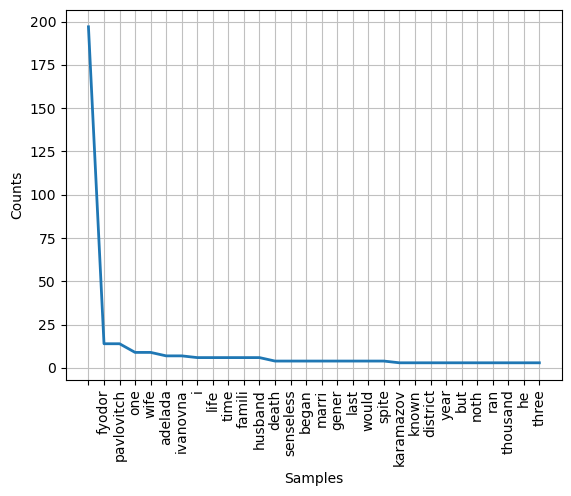

<IPython.core.display.Javascript object>

In [37]:
fdist.plot(30,cumulative=False)
plt.show()

In [38]:
# Texto listo
stemmed_words

['chapter',
 'i',
 'fyodor',
 'pavlovitch',
 'karamazov',
 'alexey',
 'fyodorovitch',
 'karamazov',
 'third',
 'son',
 'fyodor',
 'pavlovitch',
 'karamazov',
 '',
 'land',
 'owner',
 'well',
 'known',
 'district',
 'day',
 '',
 'still',
 'rememb',
 'among',
 'us',
 'owe',
 'gloomi',
 'tragic',
 'death',
 '',
 'happen',
 'thirteen',
 'year',
 'ago',
 '',
 'i',
 'shall',
 'describ',
 'properplac',
 '',
 'for',
 'present',
 'i',
 'say',
 '',
 'landown',
 '',
 'use',
 'call',
 '',
 'although',
 'hardli',
 'spent',
 'day',
 'life',
 'estatewa',
 'strang',
 'type',
 '',
 'yet',
 'one',
 'pretti',
 'frequent',
 'met',
 '',
 'type',
 'abject',
 'viciou',
 'time',
 'senseless',
 '',
 'but',
 'one',
 'senseless',
 'person',
 'well',
 'capabl',
 'look',
 'worldli',
 'affair',
 '',
 '',
 'appar',
 '',
 'noth',
 'els',
 '',
 'fyodor',
 'pavlovitch',
 '',
 'instanc',
 '',
 'began',
 'next',
 'noth',
 '',
 'estat',
 'smallest',
 '',
 'ran',
 'dine',
 'men',
 '',
 'tabl',
 '',
 'fasten',
 'toadi',
 ''

## Exercici 3
**Realitza sentiment analysis al teu conjunt de dades.**

In [39]:
from nltk.tokenize import sent_tokenize
# tokenizamos nuestro texto en frases
tokenized_sent=sent_tokenize(text)
print(tokenized_sent)

['Chapter I.\nFyodor Pavlovitch Karamazov\n\n\nAlexey Fyodorovitch Karamazov was the third son of Fyodor Pavlovitch \nKaramazov, a land owner well known in our district in his own day, and \nstill remembered among us owing to his gloomy and tragic death, which \nhappened thirteen years ago, and which I shall describe in its properplace.', 'For the present I will only say that this “landowner”—for so we\nused to call him, although he hardly spent a day of his life on his own\nestate—was a strange type, yet one pretty frequently to be met with, a\ntype abject and vicious and at the same time senseless.', 'But he was one\nof those senseless persons who are very well capable of looking after\ntheir worldly affairs, and, apparently, after nothing else.', 'Fyodor\nPavlovitch, for instance, began with next to nothing; his estate was of\nthe smallest; he ran to dine at other men’s tables, and fastened on\nthem as a toady, yet at his death it appeared that he had a hundred\nthousand roubles in 

*Para realizar el análisis de sentimientos de nuestro texto utilizaremos VADER (Valence Aware Dictionary and sEntiment Reasoner).*
*VADER es un analizador de sentimientos basado en reglas que ha sido entrenado en texto de redes sociales*.

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
 import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TAIDA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
for sentence in tokenized_sent:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print()    

Chapter I.
Fyodor Pavlovitch Karamazov


Alexey Fyodorovitch Karamazov was the third son of Fyodor Pavlovitch 
Karamazov, a land owner well known in our district in his own day, and 
still remembered among us owing to his gloomy and tragic death, which 
happened thirteen years ago, and which I shall describe in its properplace.
compound: -0.7506, 
neg: 0.148, 
neu: 0.816, 
pos: 0.036, 

For the present I will only say that this “landowner”—for so we
used to call him, although he hardly spent a day of his life on his own
estate—was a strange type, yet one pretty frequently to be met with, a
type abject and vicious and at the same time senseless.
compound: -0.0258, 
neg: 0.083, 
neu: 0.854, 
pos: 0.062, 

But he was one
of those senseless persons who are very well capable of looking after
their worldly affairs, and, apparently, after nothing else.
compound: 0.785, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 

Fyodor
Pavlovitch, for instance, began with next to nothing; his estate was of
the sma

In [43]:
# creamos un dataframe para determinar que sentimiento predomina

df_text = pd.DataFrame((tokenized_sent), columns=['token'])
df_text['negative'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neg'])
df_text['neutral'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neu'])
df_text['positive'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['pos'])
df_text['compound'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['compound'])

df_text

,token,negative,neutral,positive,compound
0,Chapter I.\nFyodor Pavlovitch Karamazov\n\n\nA...,0.148,0.816,0.036,-0.7506
1,For the present I will only say that this “lan...,0.083,0.854,0.062,-0.0258
2,But he was one\nof those senseless persons who...,0.000,0.761,0.239,0.7850
3,"Fyodor\nPavlovitch, for instance, began with n...",0.112,0.888,0.000,-0.6486
4,"At the same time, he was all his life\none of ...",0.000,0.853,0.147,0.5070
5,"I\nrepeat, it was not stupidity—the majority o...",0.000,0.725,0.275,0.7650
6,"He was married twice, and had three sons, the ...",0.000,1.000,0.000,0.0000
7,"Fyodor\nPavlovitch’s first wife, Adelaïda Ivan...",0.000,0.742,0.258,0.7650
8,"How it came to pass that an heiress, who was a...",0.119,0.804,0.077,-0.5267
9,I knew a young lady of the last “romantic”\nge...,0.034,0.817,0.149,0.8347


*VaderSentiment devuelve un diccionario de puntajes de sentimiento para el texto a analizar. Cada revisión tiene una puntuación negativa, una puntuación neutral, una puntuación positiva y una puntuación compuesta. El puntaje compuesto es una evaluación integral de los primeros tres puntajes. Este puntaje varía de -1 a 1.*
*Nuestro texto pertenece a un artículo que describe un lenguaje, no es un artículo de opinión ni un texto que pertenezca a una red social. La naturaleza de nuestro texto es coherente con los puntajes obtenidos, ninguno negativo, la mayoría neutros salvo el último de los tokes que tiene un sentimiento positivo de 0.1 sobre 1, que hace que compound varíe.*

**El análisis de nuestro texto nos devuelve un sentimiento neutro asociado a él.**